## Kernel PCA 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

Text(0,0.5,'$x_2$')

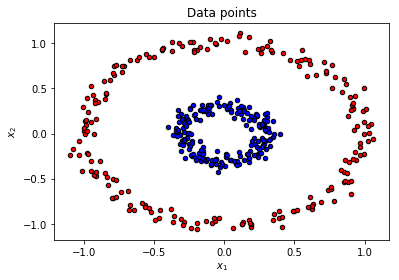

In [2]:
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

plt.figure()
plt.title("Data points")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue", s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Now, we project the data randomly in a larger dimension

In [3]:
D=10000
F=np.random.randn(2,D)*np.sqrt(5)
XX=(1/np.sqrt(D))*np.concatenate((np.cos(X@F),np.sin(X@F)),axis=1)

All right, now we have the original data, and the data in the new space, it is time to do a PCA

In [4]:
pca = PCA(n_components=2,whiten=True)
X_pca = pca.fit_transform(X)
XX_pca = pca.fit_transform(XX)

NameError: name 'kpca' is not defined

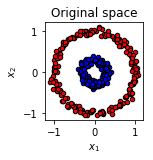

In [5]:
# Plot results

plt.figure()

plt.subplot(1, 3, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(1, 3, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("PCA on X")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(1, 3, 3, aspect='equal')
plt.scatter(XX_pca[reds, 0], XX_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(XX_pca[blues, 0], XX_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("PCA on XX")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

#plt.subplots_adjust(0.02, 0.10, 0.98, 0.94, 0.04, 0.35)

plt.show()

Of course, we could also used Kernel PCA directly. Since PCA is just an eigenvalue search on the matrix $XX^T$, this simply means one needs to work with the matrix $X^TX$

In [6]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

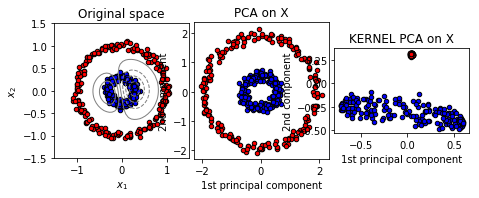

In [7]:
# Plot results

plt.figure()

plt.subplot(1, 3, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(1, 3, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("PCA on X")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(1, 3, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("KERNEL PCA on X")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplots_adjust(0.02, 0.10, 0.98, 0.94, 0.04, 0.35)

plt.show()